In [1]:
#import laibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import traing data
df_train = pd.read_csv("C:\\Users\\USER\\Desktop\\data\\train.csv")
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2/5/2010,24924.50,False
1,1,1,2/12/2010,46039.49,True
2,1,1,2/19/2010,41595.55,False
3,1,1,2/26/2010,19403.54,False
4,1,1,3/5/2010,21827.90,False


In [3]:
#filtered dataset for Store id (1 to 6)
df_train = df_train[df_train['Store'].between(1, 6)]
df_train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2/5/2010,24924.50,False
1,1,1,2/12/2010,46039.49,True
2,1,1,2/19/2010,41595.55,False
3,1,1,2/26/2010,19403.54,False
4,1,1,3/5/2010,21827.90,False
...,...,...,...,...,...
58995,6,99,8/31/2012,30.08,False
58996,6,99,9/7/2012,50.02,True
58997,6,99,9/14/2012,0.04,False
58998,6,99,10/5/2012,440.00,False


In [4]:
#types of trian dataset
print(df_train.dtypes)

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object


In [5]:
#null count
df_train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [6]:
data = df_train

In [7]:
data['Date'] = pd.to_datetime(data['Date'])

# Extract year-month from the 'Date' column for grouping
data['YearMonth'] = data['Date'].dt.to_period('M')

# Group by YearMonth and calculate the sum of Weekly_Sales
monthly_sales = data.groupby('YearMonth')['Weekly_Sales'].sum().reset_index()

# Rename columns for clarity
monthly_sales.rename(columns={'Weekly_Sales': 'Monthly_Sales'}, inplace=True)

# Merge the monthly sales back into the original data (on YearMonth)
data = data.merge(monthly_sales, on='YearMonth', how='left')

# Display the updated dataset with the new column
print(data.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday YearMonth  Monthly_Sales
0      1     1 2010-02-05      24924.50      False   2010-02    32043668.70
1      1     1 2010-02-12      46039.49       True   2010-02    32043668.70
2      1     1 2010-02-19      41595.55      False   2010-02    32043668.70
3      1     1 2010-02-26      19403.54      False   2010-02    32043668.70
4      1     1 2010-03-05      21827.90      False   2010-03    30075291.51


In [8]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,YearMonth,Monthly_Sales
0,1,1,2010-02-05,24924.50,False,2010-02,32043668.70
1,1,1,2010-02-12,46039.49,True,2010-02,32043668.70
2,1,1,2010-02-19,41595.55,False,2010-02,32043668.70
3,1,1,2010-02-26,19403.54,False,2010-02,32043668.70
4,1,1,2010-03-05,21827.90,False,2010-03,30075291.51
...,...,...,...,...,...,...,...
58995,6,99,2012-08-31,30.08,False,2012-08,39795868.82
58996,6,99,2012-09-07,50.02,True,2012-09,30467770.53
58997,6,99,2012-09-14,0.04,False,2012-09,30467770.53
58998,6,99,2012-10-05,440.00,False,2012-10,31248320.35


<Axes: >

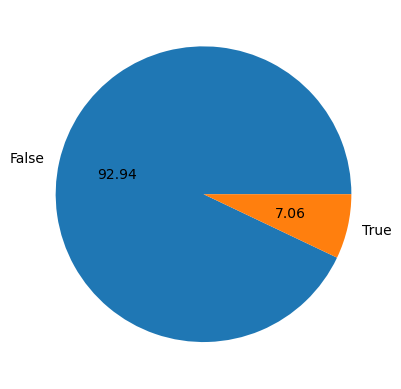

In [9]:
data.groupby('IsHoliday').size().plot(kind='pie', autopct='%.2f')

<Axes: xlabel='Store', ylabel='count'>

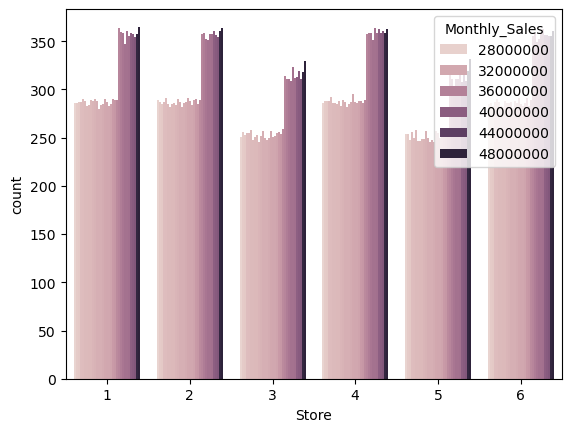

In [10]:
sns.countplot(x='Store',hue='Monthly_Sales',data=data)

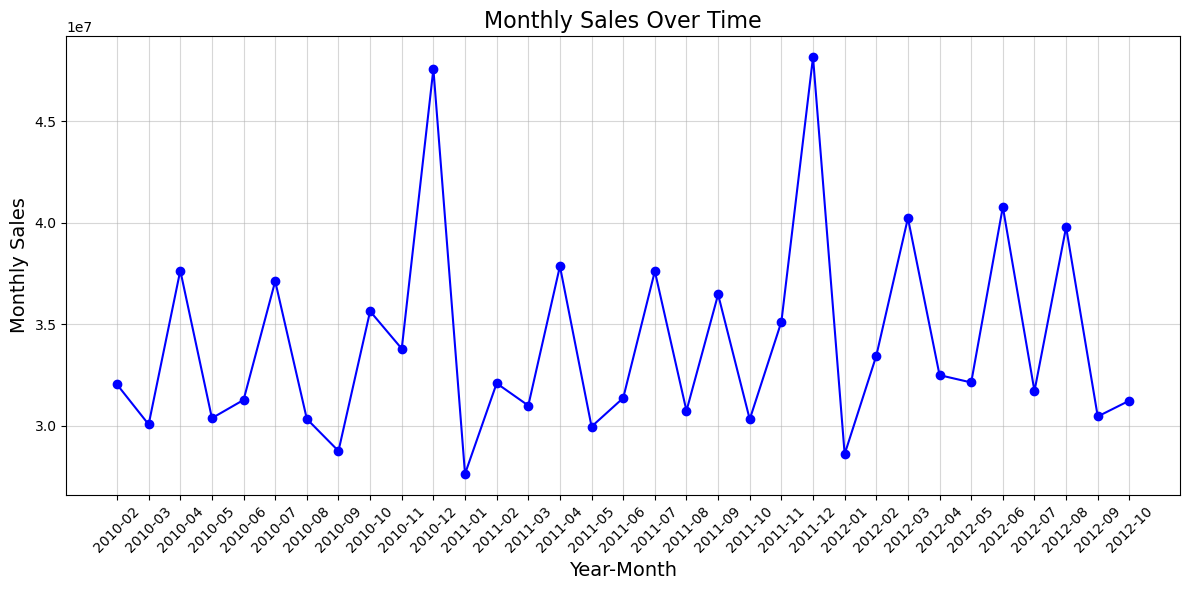

In [11]:
# Prepare data for plotting
monthly_sales_plot = monthly_sales.copy()
monthly_sales_plot['YearMonth'] = monthly_sales_plot['YearMonth'].astype(str)  # Convert Period to string for plotting

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_plot['YearMonth'], monthly_sales_plot['Monthly_Sales'], marker='o', linestyle='-', color='blue')

# Add labels, title, and formatting
plt.title('Monthly Sales Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Monthly Sales', fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()